# Special Offer Classification: Baseline Modeling

Analysis by Frank Flavell

### Subject Line Cleaning Pipeline
* UTF-8 decoding
* UTF-8 emoji & special character matching and replacement
* Datatype conversion
* Remove extraneous spaces
* Lowercase
* Expand Contractions

### Feature Engineering
* Sender Name
* Email Address
* Email Domain
* Emoji Presence
* Number of Emojis
* Emoji Name(s)
* Special Character Presence
* Number of Special Characters
* Special Character Name(s)

### Labeling
<br>
<br>
Scott and I analyzed over 4,000 subject lines and labeled them either as special offer or not special offer.  We are using this body of ~4,000 subject lines to train and test the following classification models.

### Modeling
* Dummy Classifiers: Most Frequent, stratified and uniform
* Logistic Regression
* Naive Bayes
* Random Forest
* Support Vector Machine

### Target
* 1: True


## Table of Contents<span id="0"></span>

1. [**Train/ Test Split & Dummy Classifier**](#1)
<br/><br/>
2. [**Logistic Regression**](#2)
<br/><br/>
3. [**Naive Bayes**](#3)
<br/><br/>
4. [**Random Forest**](#4)
<br/><br/>
5. [**Support Vector Machine**](#5)
<br/><br/>
6. [**Evaluation & Findings**](#6)
<br/><br/>
7. [**In-Notebook Demo**](#6)

# Package Import

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Pre-Processing
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

#Train/Test Split
from sklearn.model_selection import train_test_split

#Modeling Processing Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Data Import and Review

In [96]:
df = pd.read_csv('spec_offer_train_cleaned.csv')

In [97]:
df.head()

,subject,spec_offer,emoji_in,emoji_num,emoji_name,chars_in,char_num,char_name
0,"m. frank, explore courses to prepare for your ...",1,False,0.0,None,False,0.0,None
1,free shipping on 1000s of styles 50-70% off,1,False,0.0,None,True,1.0,'dash'
2,"dress up/down khaki shorts -btw, everything sh...",1,False,0.0,None,True,1.0,'dash'
3,last chance! free shipping + 50-70% off almost...,1,False,0.0,None,True,1.0,'dash'
4,fw: [external email]moms climb for free to cel...,1,False,0.0,None,False,0.0,None


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject     4223 non-null   object 
 1   spec_offer  4229 non-null   int64  
 2   emoji_in    4229 non-null   bool   
 3   emoji_num   4229 non-null   float64
 4   emoji_name  4229 non-null   object 
 5   chars_in    4229 non-null   bool   
 6   char_num    4229 non-null   float64
 7   char_name   4229 non-null   object 
dtypes: bool(2), float64(2), int64(1), object(3)
memory usage: 206.6+ KB


# <span id="1"></span>1. Train/ Test Split
#### [Return Contents](#0)

In [99]:
X = df.subject
y = df.spec_offer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [100]:
spec_offer = ['False', 'True']

In [101]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Accuracy':[],
                           'Precision':[],
                           'FP':[],
                           'Recall':[],
                           'FN':[],
                           'F1-Score':[]})

### Dummy Classifiers

In [103]:
all_strategies = ['most_frequent', 'stratified', 'uniform', 'logreg', 'naive bayes', 'random forest', 'SVM']

In [104]:
dc_strategies = ['most_frequent', 'stratified', 'uniform'] 
  
test_scores = [] 
for s in dc_strategies: 
    dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, y_train) 
    score = dclf.score(X_test, y_test) 
    test_scores.append(score)

In [105]:
print(test_scores)

[0.458628841607565, 0.5023640661938534, 0.5106382978723404]


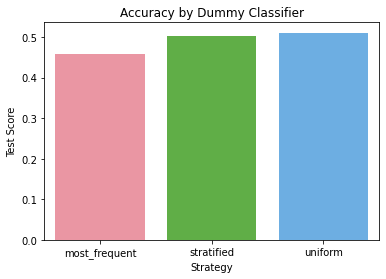

In [106]:
pal = sns.color_palette(("#7449f6", "#ee823e"))
sns.set_palette(pal)
ax = sns.barplot(dc_strategies, test_scores); 
ax.set(xlabel ='Strategy', ylabel ='Test Score', title='Accuracy by Dummy Classifier') 
plt.show()

# <span id="2"></span>2. Logistic Regression
#### [Return Contents](#0)

In [107]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
# INSERT VECTORIZER INSTEAD
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [108]:
type(X_train.values.astype('U'))

numpy.ndarray

In [109]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train.values.astype('U'), y_train)

y_pred_log1 = logreg.predict(X_test.values.astype('U'))

print('Accuracy %s' % accuracy_score(y_test, y_pred_log1))
test_scores.append(accuracy_score(y_test, y_pred_log1))
print(classification_report(y_test, y_pred_log1,target_names=spec_offer))

cm = metrics.confusion_matrix(y_test, y_pred_log1)
acc = float(format(metrics.accuracy_score(y_test, y_pred_log1, sample_weight=None), '.3f'))
prec = float(format(metrics.precision_score(y_test, y_pred_log1, average='macro'),'.3f'))
fp = cm[0,1]
rec = float(format(metrics.recall_score(y_test, y_pred_log1, average='macro'),'.3f'))
fn = cm[1,0]
f1 = float(format(metrics.f1_score(y_test, y_pred_log1, average='macro'),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Logistic Regression-1','text only',acc,prec,fp,rec,fn,f1]
evaluation.sort_values(by = 'F1-Score', ascending=False)


accuracy 0.9550827423167849
              precision    recall  f1-score   support

       False       0.95      0.95      0.95       388
        True       0.96      0.96      0.96       458

    accuracy                           0.96       846
   macro avg       0.95      0.95      0.95       846
weighted avg       0.96      0.96      0.96       846



,Model,Details,Accuracy,Precision,FP,Recall,FN,F1-Score
0,Logistic Regression-1,text only,0.955,0.955,18,0.955,20,0.955


Testing trained model on new inputs.

In [110]:
message = ['Save 50% starting now!']

In [111]:
pred = logreg.predict(message)

In [112]:
pred[0] == 1

True

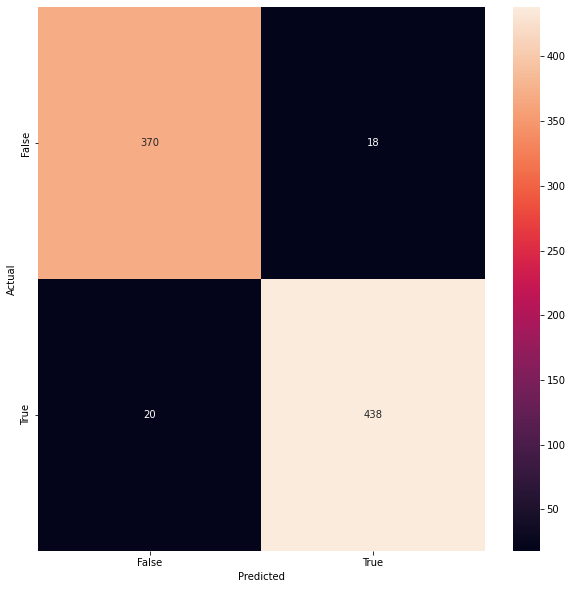

In [113]:
conf_mat = confusion_matrix(y_test, y_pred_log1)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=spec_offer, yticklabels=spec_offer)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# <span id="3"></span>3. Naive Bayes
#### [Return Contents](#0)

In [114]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train.values.astype('U'), y_train)

y_pred_nb1 = nb.predict(X_test.values.astype('U'))

print('accuracy %s' % accuracy_score(y_test, y_pred_nb1))
test_scores.append(accuracy_score(y_test, y_pred_nb1))
print(classification_report(y_test, y_pred_nb1,target_names=spec_offer))

cm = metrics.confusion_matrix(y_test, y_pred_nb1)
acc = float(format(metrics.accuracy_score(y_test, y_pred_nb1, sample_weight=None), '.3f'))
prec = float(format(metrics.precision_score(y_test, y_pred_nb1, average='macro'),'.3f'))
fp = cm[0,1]
rec = float(format(metrics.recall_score(y_test, y_pred_nb1, average='macro'),'.3f'))
fn = cm[1,0]
f1 = float(format(metrics.f1_score(y_test, y_pred_nb1, average='macro'),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Naive Bayes-1','text only',acc,prec,fp,rec,fn,f1]
evaluation.sort_values(by = 'F1-Score', ascending=False)

accuracy 0.9231678486997635
              precision    recall  f1-score   support

       False       0.97      0.86      0.91       388
        True       0.89      0.98      0.93       458

    accuracy                           0.92       846
   macro avg       0.93      0.92      0.92       846
weighted avg       0.93      0.92      0.92       846



,Model,Details,Accuracy,Precision,FP,Recall,FN,F1-Score
0,Logistic Regression-1,text only,0.955,0.955,18,0.955,20,0.955
1,Naive Bayes-1,text only,0.923,0.931,56,0.918,9,0.922


# <span id="4"></span>4. Random Forest
#### [Return Contents](#0)

In [115]:
rdf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=100, max_depth= 5)),
               ])
rdf.fit(X_train.values.astype('U'), y_train)

y_pred_rf1 = rdf.predict(X_test.values.astype('U'))

print('accuracy %s' % accuracy_score(y_test, y_pred_rf1))
test_scores.append(accuracy_score(y_test, y_pred_rf1))
print(classification_report(y_test, y_pred_rf1,target_names=spec_offer))

cm = metrics.confusion_matrix(y_test, y_pred_rf1)
acc = float(format(metrics.accuracy_score(y_test, y_pred_rf1, sample_weight=None), '.3f'))
prec = float(format(metrics.precision_score(y_test, y_pred_rf1, average='macro'),'.3f'))
fp = cm[0,1]
rec = float(format(metrics.recall_score(y_test, y_pred_rf1, average='macro'),'.3f'))
fn = cm[1,0]
f1 = float(format(metrics.f1_score(y_test, y_pred_rf1, average='macro'),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest-1','text only',acc,prec,fp,rec,fn,f1]
evaluation.sort_values(by = 'F1-Score', ascending=False)

accuracy 0.8699763593380615
              precision    recall  f1-score   support

       False       0.79      0.98      0.87       388
        True       0.98      0.78      0.87       458

    accuracy                           0.87       846
   macro avg       0.88      0.88      0.87       846
weighted avg       0.89      0.87      0.87       846



,Model,Details,Accuracy,Precision,FP,Recall,FN,F1-Score
0,Logistic Regression-1,text only,0.955,0.955,18,0.955,20,0.955
1,Naive Bayes-1,text only,0.923,0.931,56,0.918,9,0.922
2,Random Forest-1,text only,0.870,0.884,7,0.879,103,0.870


# <span id="5"></span>5. Support Vector Machine
#### [Return Contents](#0)

In [116]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train.values.astype('U'), y_train)

y_pred_svm1 = sgd.predict(X_test.values.astype('U'))

print('accuracy %s' % accuracy_score(y_test, y_pred_svm1))
test_scores.append(accuracy_score(y_test, y_pred_svm1))
print(classification_report(y_test, y_pred_svm1,target_names=spec_offer))

cm = metrics.confusion_matrix(y_test, y_pred_svm1)
acc = float(format(metrics.accuracy_score(y_test, y_pred_svm1, sample_weight=None), '.3f'))
prec = float(format(metrics.precision_score(y_test, y_pred_svm1, average='macro'),'.3f'))
fp = cm[0,1]
rec = float(format(metrics.recall_score(y_test, y_pred_svm1, average='macro'),'.3f'))
fn = cm[1,0]
f1 = float(format(metrics.f1_score(y_test, y_pred_svm1, average='macro'),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['SVM-1','text only',acc,prec,fp,rec,fn,f1]
evaluation.sort_values(by = 'F1-Score', ascending=False)

accuracy 0.9456264775413712
              precision    recall  f1-score   support

       False       0.91      0.98      0.94       388
        True       0.98      0.92      0.95       458

    accuracy                           0.95       846
   macro avg       0.95      0.95      0.95       846
weighted avg       0.95      0.95      0.95       846



,Model,Details,Accuracy,Precision,FP,Recall,FN,F1-Score
0,Logistic Regression-1,text only,0.955,0.955,18,0.955,20,0.955
3,SVM-1,text only,0.946,0.945,8,0.948,38,0.946
1,Naive Bayes-1,text only,0.923,0.931,56,0.918,9,0.922
2,Random Forest-1,text only,0.870,0.884,7,0.879,103,0.870


In [117]:
test_scores

[0.458628841607565,
 0.5023640661938534,
 0.5106382978723404,
 0.9550827423167849,
 0.9231678486997635,
 0.8699763593380615,
 0.9456264775413712]

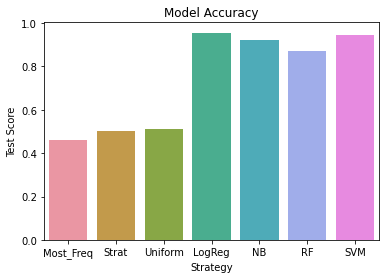

In [118]:
# all_strategies = ['Most_Freq', 'Strat', 'Uniform', 'LogReg', 'NB', 'RF', 'SVM']
pal = sns.color_palette(("#7449f6", "#ee823e"))
sns.set_palette(pal)
ax = sns.barplot(['Most_Freq', 'Strat', 'Uniform', 'LogReg', 'NB', 'RF', 'SVM'], test_scores); 
ax.set(xlabel ='Strategy', ylabel ='Test Score', title='Model Accuracy') 
plt.show()

# <span id="6"></span>6. Evaluation & Findings
#### [Return Contents](#0)

### Evaluation

The best was logistic regression with a 95% accuracy and an F1-Score of 0.955.  I focused model evaluation primarily on the F1-Score because the cost of a false negative and a false positive are essentially the same - both result in a false prediction for the user: a marketer using this program to analyze their email subject lines.

### Findings

**False Positives**

Subject lines that were incorrectly categorized as special promotions.

After analyzing the false positives, I noticed:
* Some of the observations were mislabeled and were actually correctly classified.
* The other subject lines were product promotions, very similar in style to a special offer but they simply promote a product without any deals associated with the promotion.  We will need to include more product promotions in model training to improve performance.

**False Negatives**

Subject lines that were incorrectly categorized as NOT special promotions.

After analyzing the false negatives, I noticed:
* Need to improve the cleaning pipeline to add spaces before '$' and ':' the model wasn't recognizing words collapsed together. 
* The model struggled to recogize specific techniques like putting a space between every letter in the subject line
* The model couldn't effectively recognize certain key words in certain contexts:
    * 'refer', 'refering', referral'
    * 'reward', 'rewards'
    * 'limited time:'
    * 'perks'
    * very specific percentages like '76% off' and "31% off'
    * 'savings'
    * 'sale'
    * 'doorbusters'
    * more vague constructions like 'a big something just for you' and 'you deserve a reward!'
    
### Next Steps

* Update mislabeled observations
* Improve the cleaning pipeline
* Expand the vocabulary around special offers and construct examples including less common special offer language. 


In [130]:
data = {'subject': X_test,
        'test': y_test,
        'logreg_pred': y_pred_log1}

test_df = pd.DataFrame(data)

In [132]:
test_df.head()

,subject,test,logreg_pred
1736,you need new shorts (up to 60% off 1000s of st...,1,1
4021,"your seesaw updates for october 6th, 2021",0,0
2390,book now: new session just added for mlk day!,0,1
908,+25% off all final sale,1,1
1344,surprise: free 2-day shipping,1,1


In [133]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 1736 to 257
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subject      844 non-null    object
 1   test         846 non-null    int64 
 2   logreg_pred  846 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 26.4+ KB


## False Positives

In [135]:
test_df[(test_df.test == 0) & (test_df.logreg_pred == 1)]

,subject,test,logreg_pred
2390,book now: new session just added for mlk day!,0,1
2632,save on skating + snacks + drinks during march...,0,1
3125,get your summer skate on!,0,1
3539,just in & just right styles,0,1
3944,power up with big laptop,0,1
3109,bbq season is back,0,1
3127,new styles added! 0,0,1
3809,get more out of introduction to javascript,0,1
3526,upgrade your space and save up to,0,1
3443,final countdown: the end of season sale,0,1


## False Negatives

In [136]:
test_df[(test_df.test == 1) & (test_df.logreg_pred == 0)]

,subject,test,logreg_pred
1334,f l a s h / s a l e / e x t r a / 4 0 % / o f f,1,0
1972,you deserve a reward!,1,0
551,"refer a friend for$500, this week only",1,0
2441,"frank, 2 for$3 on select kleenex tissues or we...",1,0
2927,limited time: 10 reams for only$31.99!,1,0
120,pay$0/month until graduation,1,0
3795,"kids & baby sale:$6 graphic tees,$7 mix & matc...",1,0
2281,a big something just for you,1,0
3137,our best perks ever. meet the new gap good rew...,1,0
2259,get text alerts for your best deals this holid...,1,0


# <span id="7"></span>7. In-Notebook Demo
#### [Return Contents](#0)

I built a function that takes in a string and outputs a prediction and checks for validation.

In [123]:
def spec_offer(response):
#     reponse = raw_input("Hi! How're you feeling today?")
#     cleaned = pipeline(response)
    subject = logreg.predict([response])
    if subject[0] == 0:
        print('\n')
        print("This is not a special offer")
        print('\n')
        val = input("Is that correct?\n\n")
    else:
        print('\n')
        print("This is a special offer")
        print('\n')
        val = input("Is that correct?\n\n")

In [141]:
message = input("Type your subject line below\n\n")
spec_offer(message)

Type your subject line below

Get ready to save big!


This is a special offer


Is that correct?

Yes


Learn more about our big company - Yes
Get big savings all this week! - Yes
Get ready to save big! - Yes
They improved performance by 50-70% - Yes
Get ready for our Fall Extravaganza! Save big! - Yes
Don't wait! 30% off all items with free shipping! - Yes
Fall clearance - Yes
Up to 72.4% off! - Yes
Upto72.4% off - Yes